In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import hdf5plugin
import h5py

import sys
import os

sys.path.insert(0, '../src/')
from temporal_autocorrelation import *
from mask_tools import * 
from fit_tools import *
from parameters import *

plot_save=False

### open hdf5 file 

Note that the hdf5plugin must be installed (pip install hdf5plugin)

In [2]:
file_name = 'lda_dp52_00028_data_000001.h5'
file_path = '../data/'+file_name
h5file = h5py.File(file_path, 'r')
data = h5file['entry/data/data/']

In [3]:
avg_data = np.sum(data,axis=0)/float(data.shape[0])

### load mask and parameters

In [4]:
mask = np.load('../masks/eiger_mask.npy')
dpix,Ldet,center  = eiger_parameters()

### temporal autocorrelation g2

reduce array size to speed up the calculation

In [5]:
sxy = 120
dx = [center[0]-sxy,center[0]+sxy]
dy = [center[1]-sxy,center[1]+sxy]

data_small = data[:,dx[0]:dx[1],dy[0]:dy[1]]
center_small = [center[0]-dx[0],center[1]-dy[0]]
mask_small = mask[dx[0]:dx[1],dy[0]:dy[1]]

calculate g2

In [6]:
qt,dt,g2,r_mask = calculate_g2(data_small,mask=mask_small,center=center_small)

make plots

/Users/fivos/pyvos/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/fivos/pyvos/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in multiply


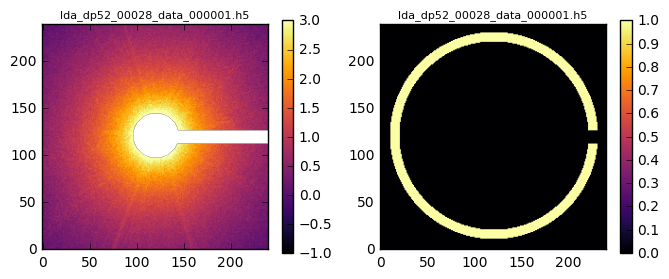

In [15]:
plt.figure(figsize=[8,3])
plt.subplot(1,2,1)
plt_data = np.log10(avg_data[dx[0]:dx[1],dy[0]:dy[1]]*mask_small)
plt.imshow(plt_data*mask_small,vmax=3,vmin=-1,origin='lower',cmap='inferno')
plt.colorbar()
plt.title(file_name,size=8)

plt.subplot(1,2,2)
plt.imshow(r_mask,origin='lower',cmap='inferno')
plt.title(file_name,size=8)
plt.colorbar()
plt.show()

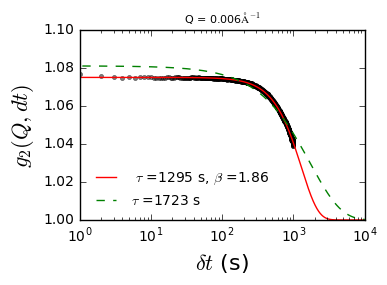

In [21]:
plt.figure(figsize=[4,3])

i=0
plt.plot(dt,g2[:,i],'o',alpha=0.5,c='black',ms=3) 

popt,x,curve,perr = fit(stretched_exponential,dt,g2[:,i],p0=[0.06,1e3,1])
plt.plot(x,curve,c='red',ls='-',lw=1,label=r' $\tau$ =%d s, $\beta$ =%.2f'%(popt[1],popt[2]))
popt,x,curve,perr = fit(exponential,dt,g2[:,i],p0=[g2[0,i],1e3])
plt.plot(x,curve,c='green',ls='--',lw=1,label=r'$\tau$ =%d s'%(popt[1]))

plt.xlabel(r'$\delta t$ (s)',size=16)
plt.ylabel(r'$g_{2}(Q,dt)$ ',size=16)
plt.xscale('log',nonposy='clip')
plt.xlim([1,1e4])
plt.ylim([1,1.1])
plt.legend(frameon=False,loc='lower left', prop={'size': 10})
plt.title(r'Q = %.3f$\rm \AA^{-1}$'%qt[i],size=8)
plt.tight_layout()

plt.show()


Save results

In [ ]:
if plot_save==True:
    plt.savefig('/Users/fivos/Desktop/fig.png',dpi=300)